In [82]:
import pandas as pd
import numpy as np

qc_stats = pd.read_csv('../Results/Reports/multiqc_data/mqc_picard_deduplication_1.txt',
                      sep="\t", header=0, index_col=0)

mutations_filtered = pd.read_csv('../analysis/merged_variants_anno_vaf_filtered.txt', 
                                 sep="\t", header=0, index_col=0, low_memory=False)

mutations = pd.read_csv('../analysis/merged_variants_anno_vaf.txt',
                        sep="\t", header=0, index_col=0, low_memory=False)


metasamples = pd.read_excel('../Metadata.xlsx')
metasamples['SAMPLE_ID'] = metasamples['SAMPLE_ID'].astype(str)
metasamples.index = [x.strip() for x in metasamples['SAMPLE_ID'] + '-' + metasamples['PATIENT_ID']]
metasamples['Coverage'] = list(qc_stats.loc[metasamples['SAMPLE_ID'], 'Read Pair Unique'].astype(float) / 1000000)
metasamples['Coverage'] = metasamples['Coverage'].astype(int)

In [83]:
print('Patients: {}'.format(len(set(metasamples['PATIENT_ID']))))
print('Samples: {}'.format(len(set(metasamples['SAMPLE_ID']))))

print('Patients paired: {}'.format(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['PATIENT_ID']))))
print('Samples paired: {}'.format(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['SAMPLE_ID']))))

print('Samples(cfDNA): {}'.format(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'cfDNA']['SAMPLE_ID']))))
print('Samples(gDNA): {}'.format(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'gDNA']['SAMPLE_ID']))))
print('Samples(PDX): {}'.format(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'PDX']['SAMPLE_ID']))))
print('Samples(tumor): {}'.format(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'tumor']['SAMPLE_ID']))))

print('Samples(cfDNA) paired: {}'.format(len(set(metasamples[(metasamples['SAMPLE_TYPE'] == 'cfDNA') 
                                                             & (metasamples['TUMOR_ONLY'] == 'No')]['SAMPLE_ID']))))
print('Samples(gDNA) paired: {}'.format(len(set(metasamples[(metasamples['SAMPLE_TYPE'] == 'gDNA') 
                                                            & (metasamples['TUMOR_ONLY'] == 'No')]['SAMPLE_ID']))))
print('Samples(PDX) paired: {}'.format(len(set(metasamples[(metasamples['SAMPLE_TYPE'] == 'PDX') 
                                                           & (metasamples['TUMOR_ONLY'] == 'No')]['SAMPLE_ID']))))
print('Samples(tumor) paired: {}'.format(len(set(metasamples[(metasamples['SAMPLE_TYPE'] == 'tumor') 
                                                             & (metasamples['TUMOR_ONLY'] == 'No')]['SAMPLE_ID']))))

Patients: 50
Samples: 166
Patients paired: 30
Samples paired: 88
Samples(cfDNA): 84
Samples(gDNA): 36
Samples(PDX): 15
Samples(tumor): 31
Samples(cfDNA) paired: 56
Samples(gDNA) paired: 0
Samples(PDX) paired: 14
Samples(tumor) paired: 18


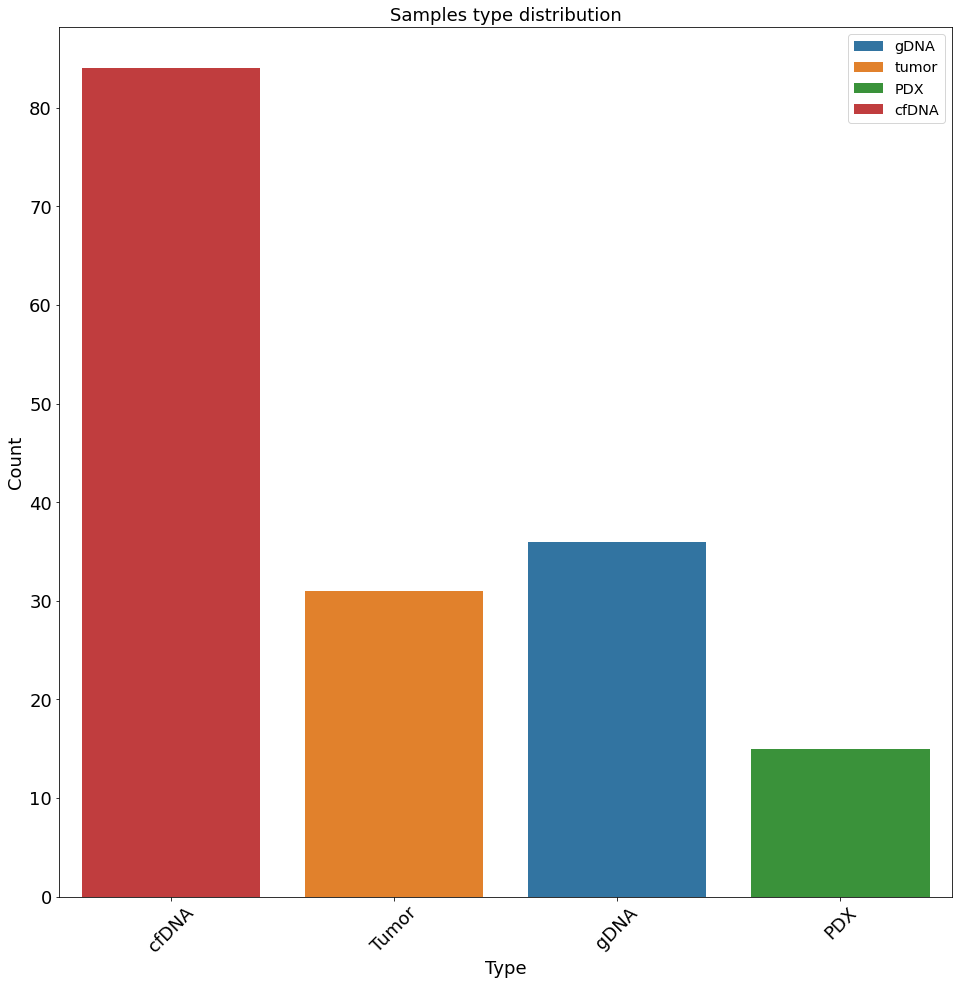

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='SAMPLE_TYPE', hue='SAMPLE_TYPE', dodge=False,
                       data=metasamples, hue_order=['gDNA', 'tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'Tumor', 'gDNA', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
_ = sns_plot.set_title('Samples type distribution', fontsize=18)
plt.legend(fontsize='x-large', title_fontsize='30')
fig.savefig('samples_type_distribution_all.pdf', dpi=180)

In [85]:
metasamples = metasamples[metasamples['INCLUDED'] == 'Y'] 

In [86]:
print('Patients: {}'.format(len(set(metasamples['PATIENT_ID']))))
print('Samples: {}'.format(len(set(metasamples['SAMPLE_ID']))))

print('Patients paired: {}'.format(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['PATIENT_ID']))))
print('Samples paired: {}'.format(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['SAMPLE_ID']))))

print('Samples(cfDNA): {}'.format(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'cfDNA']['SAMPLE_ID']))))
print('Samples(gDNA): {}'.format(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'gDNA']['SAMPLE_ID']))))
print('Samples(PDX): {}'.format(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'PDX']['SAMPLE_ID']))))
print('Samples(tumor): {}'.format(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'tumor']['SAMPLE_ID']))))

print('Samples(cfDNA) paired: {}'.format(len(set(metasamples[(metasamples['SAMPLE_TYPE'] == 'cfDNA') 
                                                             & (metasamples['TUMOR_ONLY'] == 'No')]['SAMPLE_ID']))))
print('Samples(gDNA) paired: {}'.format(len(set(metasamples[(metasamples['SAMPLE_TYPE'] == 'gDNA') 
                                                            & (metasamples['TUMOR_ONLY'] == 'No')]['SAMPLE_ID']))))
print('Samples(PDX) paired: {}'.format(len(set(metasamples[(metasamples['SAMPLE_TYPE'] == 'PDX') 
                                                           & (metasamples['TUMOR_ONLY'] == 'No')]['SAMPLE_ID']))))
print('Samples(tumor) paired: {}'.format(len(set(metasamples[(metasamples['SAMPLE_TYPE'] == 'tumor') 
                                                             & (metasamples['TUMOR_ONLY'] == 'No')]['SAMPLE_ID']))))

Patients: 31
Samples: 99
Patients paired: 20
Samples paired: 64
Samples(cfDNA): 65
Samples(gDNA): 0
Samples(PDX): 8
Samples(tumor): 26
Samples(cfDNA) paired: 42
Samples(gDNA) paired: 0
Samples(PDX) paired: 7
Samples(tumor) paired: 15


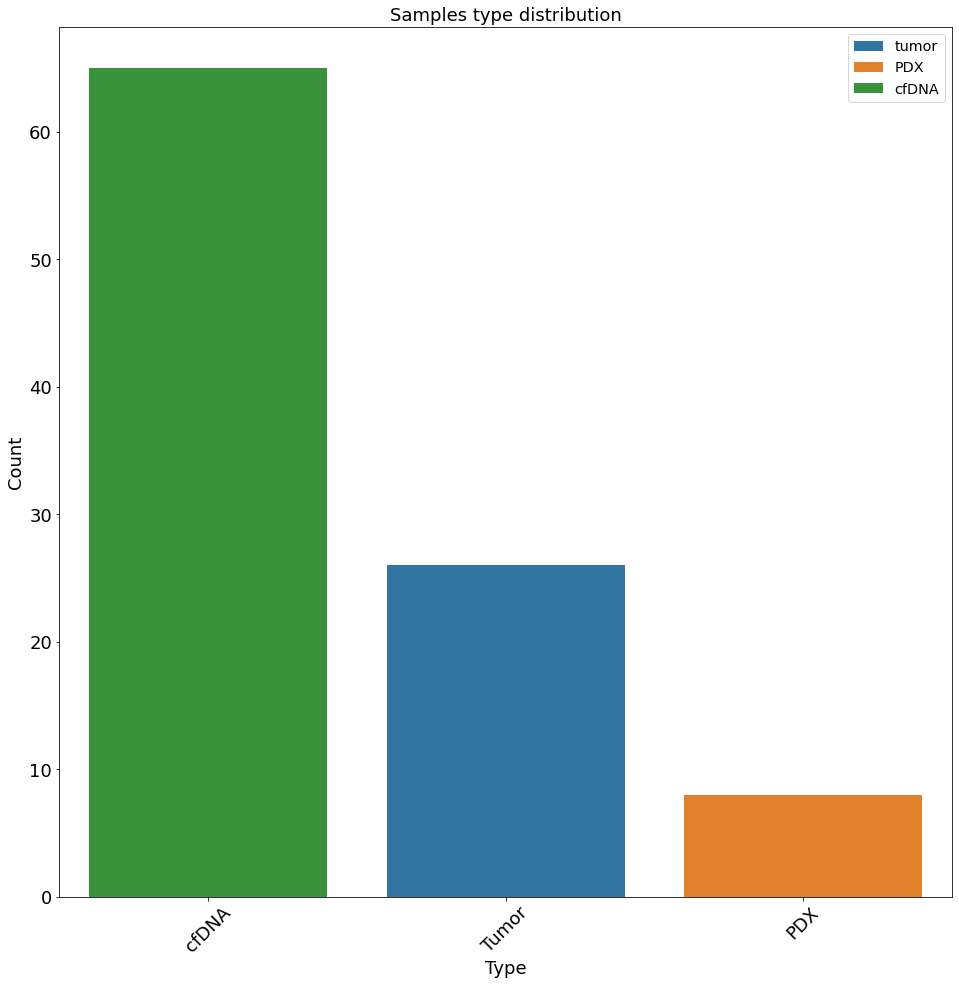

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='SAMPLE_TYPE', hue='SAMPLE_TYPE', dodge=False,
                       data=metasamples, hue_order=['tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
_ = sns_plot.set_title('Samples type distribution', fontsize=18)
plt.legend(fontsize='x-large', title_fontsize='30')
fig.savefig('samples_type_distribution_included.pdf', dpi=180)

In [88]:
SAMPLES = metasamples.index.tolist()
mutations = mutations.loc[:, mutations.columns[0:10].to_list() + SAMPLES]
mutations_filtered = mutations_filtered.loc[:, mutations_filtered.columns[0:10].to_list() + SAMPLES]

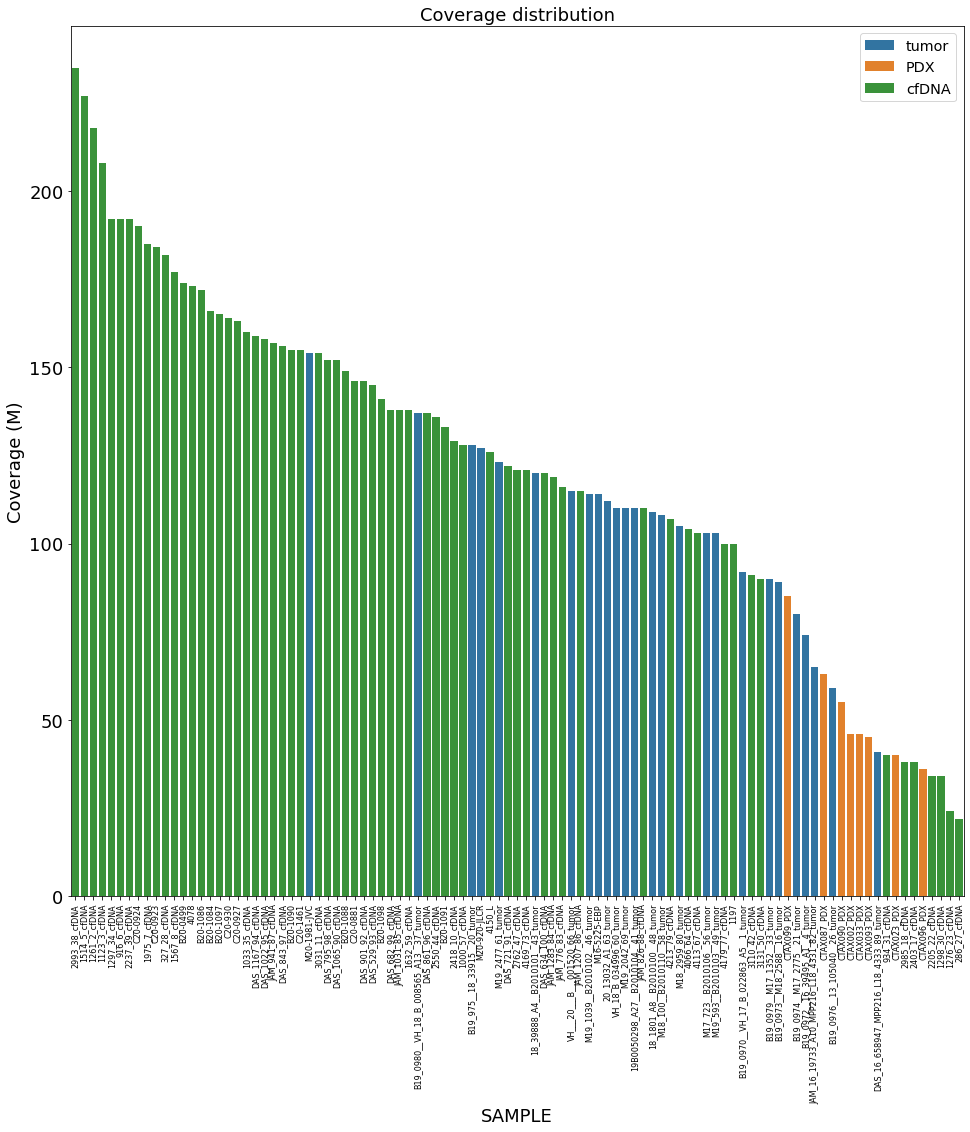

In [89]:
fig, ax = plt.subplots(figsize=(16,16))

sorted_data = metasamples.sort_values('Coverage', ascending=False)
sns_plot = sns.barplot(x='SAMPLE_ID', y='Coverage', hue="SAMPLE_TYPE", dodge=False,
                       data=sorted_data, hue_order=['tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(sorted_data.SAMPLE_ID, size=8, rotation=90)
_ = sns_plot.set_xlabel('SAMPLE', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (M)', fontsize=18)
_ = sns_plot.tick_params(axis='y', which='major', labelsize=18)
_ = sns_plot.set_title('Coverage distribution', fontsize=18)
plt.legend(fontsize='x-large', title_fontsize='20', loc='upper right')
fig.savefig('coverage_distribution_included.pdf', dpi=180)

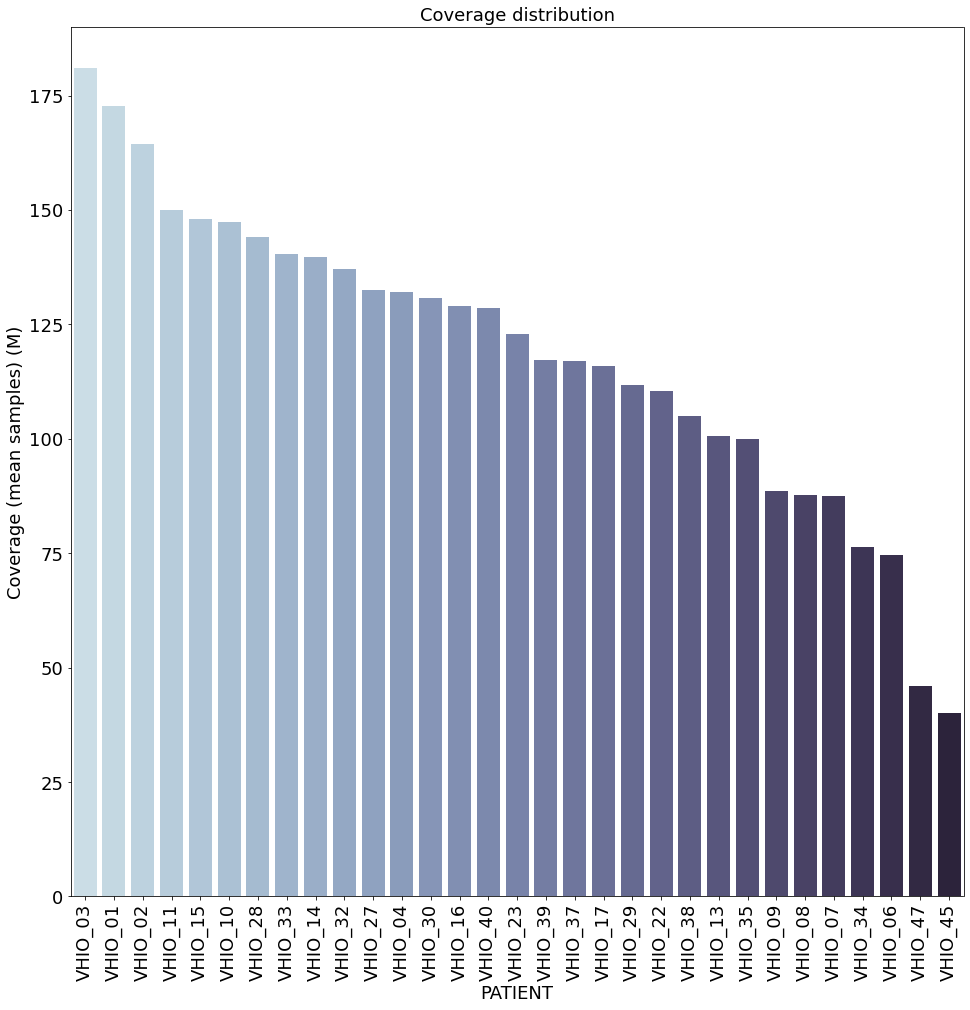

In [90]:
fig, ax = plt.subplots(figsize=(16,16))

tmp = metasamples.groupby('PATIENT_ID').mean()
tmp['PATIENT_ID'] = tmp.index
sorted_data = tmp.sort_values('Coverage', ascending=False)
sns_plot = sns.barplot(x='PATIENT_ID', y='Coverage', dodge=False, data=sorted_data, 
                       ax=ax, palette='ch:s=.25,rot=-.25')
_ = sns_plot.set_xticklabels(sorted_data.PATIENT_ID, size=16, rotation=90)
_ = sns_plot.set_xlabel('PATIENT', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (mean samples) (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
fig.savefig('coverage_distribution_per_patient_included.pdf', dpi=180)

<ipython-input-91-9f38cb43d415>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=90)


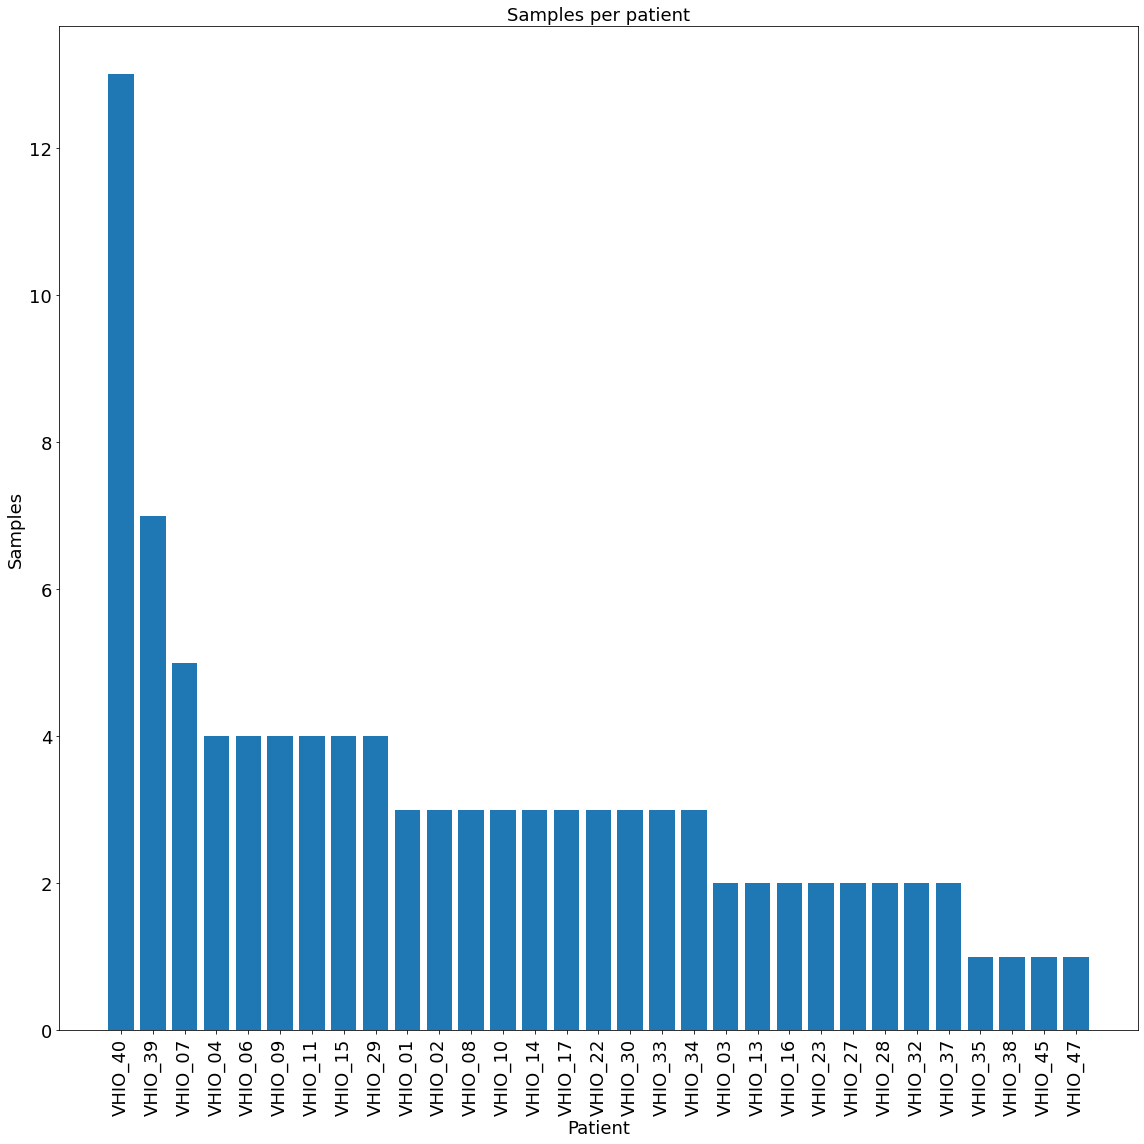

In [91]:
sub = metasamples.loc[:, ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=90)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('samples_per_patient_included.pdf', dpi=180)

<ipython-input-92-2c22f4eb366f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=90)


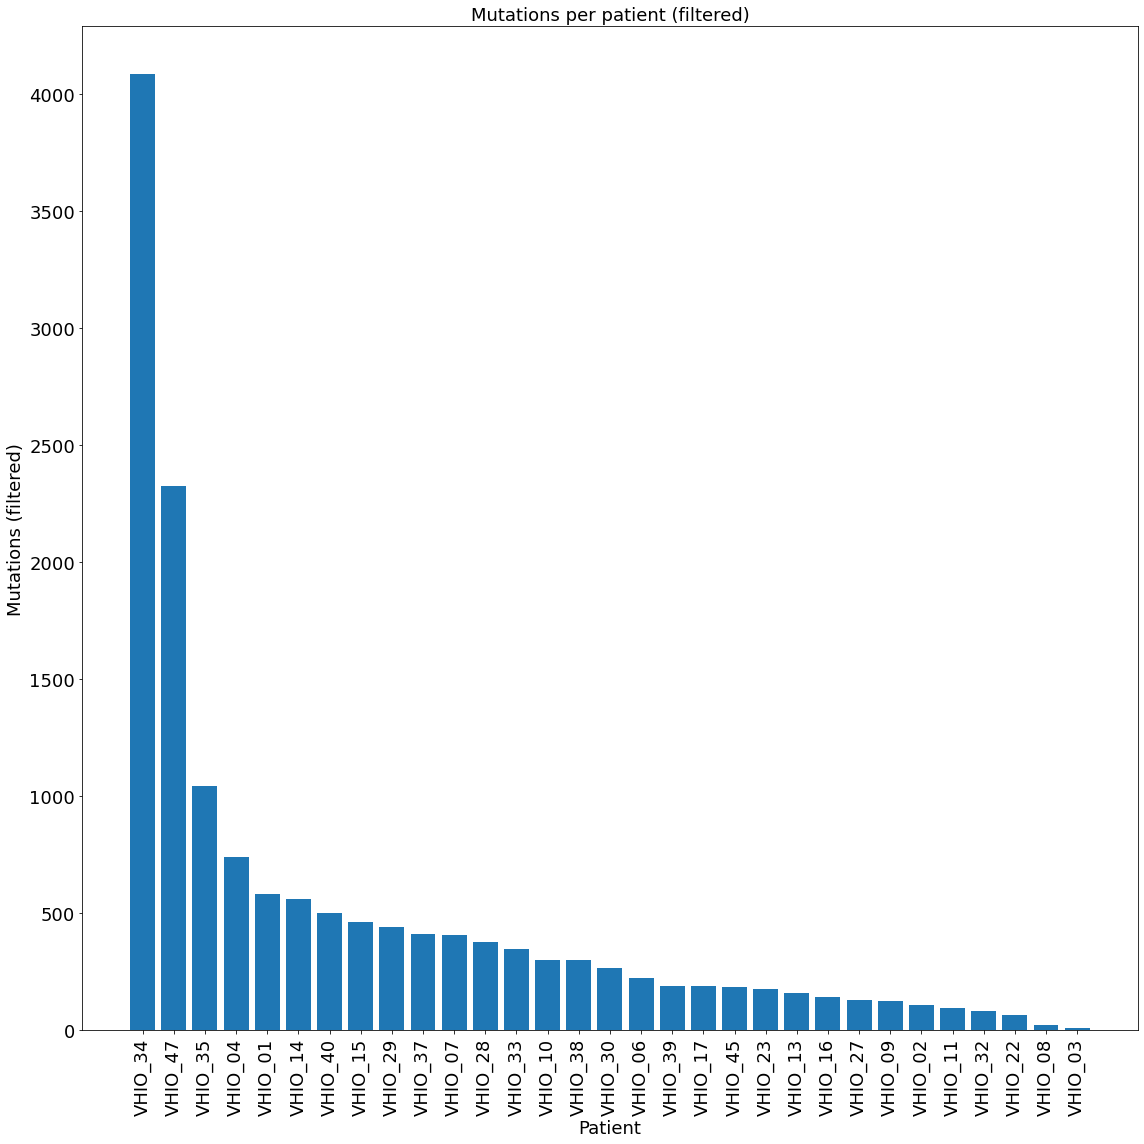

In [92]:
from collections import defaultdict

patients_mutations = defaultdict(int)

SAMPLES = metasamples.index.tolist()
for index,row in mutations_filtered.loc[:, mutations_filtered.columns[0:10].to_list() + SAMPLES].iterrows():
    for c,v in row[10:].items():
        if float(v) != 0:
            patient = c.split('-')[-1]
            patients_mutations[patient] += 1
    
fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations.keys(), 
                                         patients_mutations.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=90)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations (filtered)', fontsize=18)
ax.set_title('Mutations per patient (filtered)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('mutations_per_patient.pdf', dpi=180)

<ipython-input-93-31ead78ef821>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


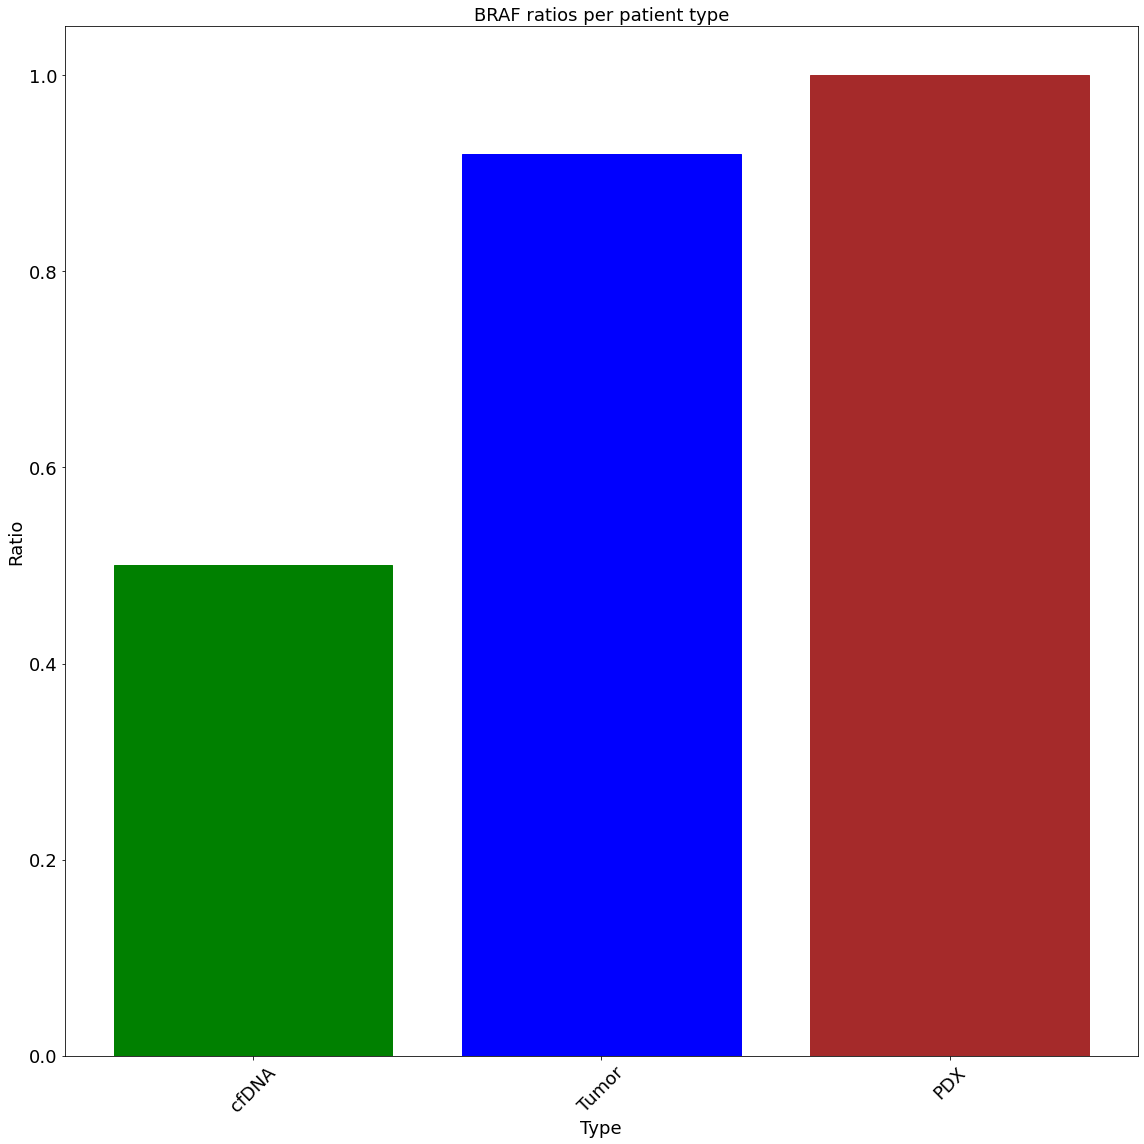

In [93]:
total_pdx = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'PDX'), 'PATIENT_ID']))
total_cfdna = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'cfDNA'), 'PATIENT_ID']))
total_tumor = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'tumor'), 'PATIENT_ID']))

ratios_braf = list()

SAMPLES = metasamples.index.tolist()
mut_braf = mutations.loc[mutations['GENE'] == 'BRAF', mutations.columns[0:10].to_list() + SAMPLES]
for index,row in mut_braf.iterrows():
    if 'p.Val600Glu' in row['AACHANGE']:
        braf_mutations_cfDNA = set()
        braf_mutations_tumor = set()
        braf_mutations_PDX = set()
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = metasamples.loc[c, 'SAMPLE_TYPE']
                patient = c.split('-')[-1]
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA.add(patient)
                elif 'tumor' in sample_type:
                    braf_mutations_tumor.add(patient)
                elif 'PDX' in sample_type:
                    braf_mutations_PDX.add(patient)
                else:
                    print(c)
        ratios_braf.append((len(braf_mutations_cfDNA) / total_cfdna,
                            len(braf_mutations_tumor) / total_tumor,
                            len(braf_mutations_PDX) / total_pdx))
  
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per patient type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('braf_ratios_patients.pdf', dpi=180)

<ipython-input-94-3d083b07a899>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


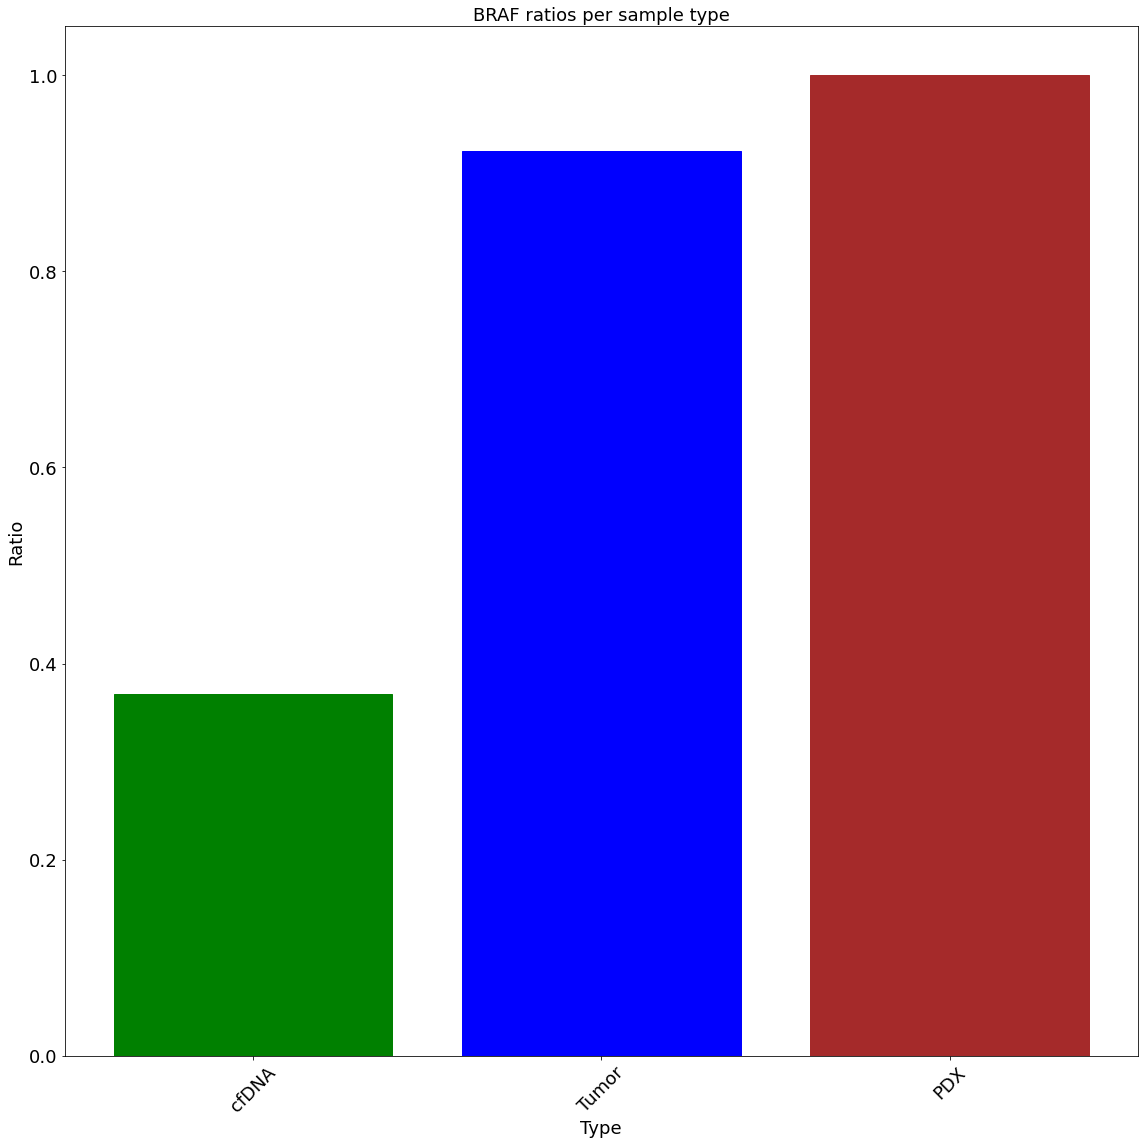

In [94]:
total_pdx = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'PDX'), 'SAMPLE_ID']))
total_cfdna = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'cfDNA'), 'SAMPLE_ID']))
total_tumor = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'tumor'), 'SAMPLE_ID']))

ratios_braf = list()

mut_braf = mutations.loc[mutations['GENE'] == 'BRAF']
for index,row in mut_braf.iterrows():
    if 'p.Val600Glu' in row['AACHANGE']:
        braf_mutations_cfDNA = 0
        braf_mutations_tumor = 0
        braf_mutations_PDX = 0
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = metasamples.loc[c, 'SAMPLE_TYPE']
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA += 1
                elif 'tumor' in sample_type:
                    braf_mutations_tumor += 1
                elif 'PDX' in sample_type:
                    braf_mutations_PDX += 1
                else:
                    print(c)      
        ratios_braf.append((braf_mutations_cfDNA / total_cfdna,
                            braf_mutations_tumor / total_tumor,
                            braf_mutations_PDX / total_pdx))
        
        
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per sample type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
fig.tight_layout()
fig.savefig('braf_ratios_samples.pdf', dpi=180)

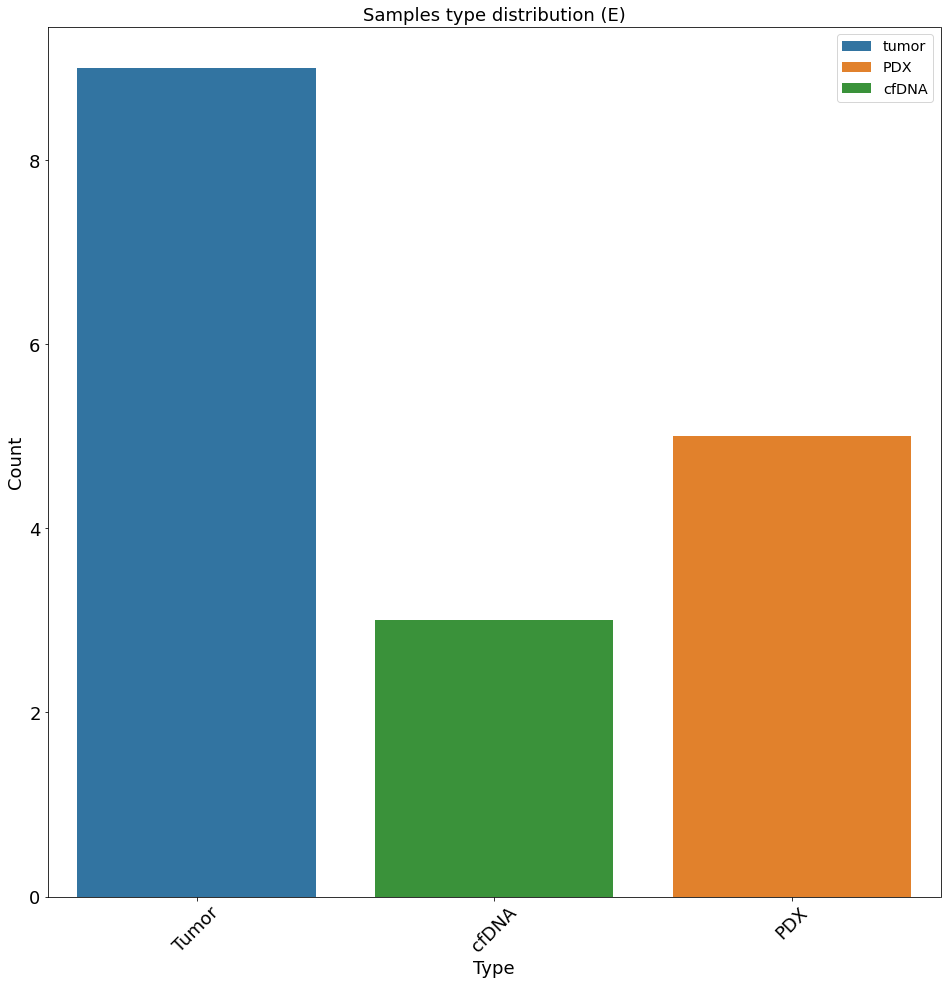

In [95]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='SAMPLE_TYPE', hue='SAMPLE_TYPE', dodge=False,
                         data=metasamples[metasamples['VAR2'] == 'E'], 
                         hue_order=['tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['Tumor', 'cfDNA', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.set_title('Samples type distribution (E)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution_E.pdf', dpi=180)

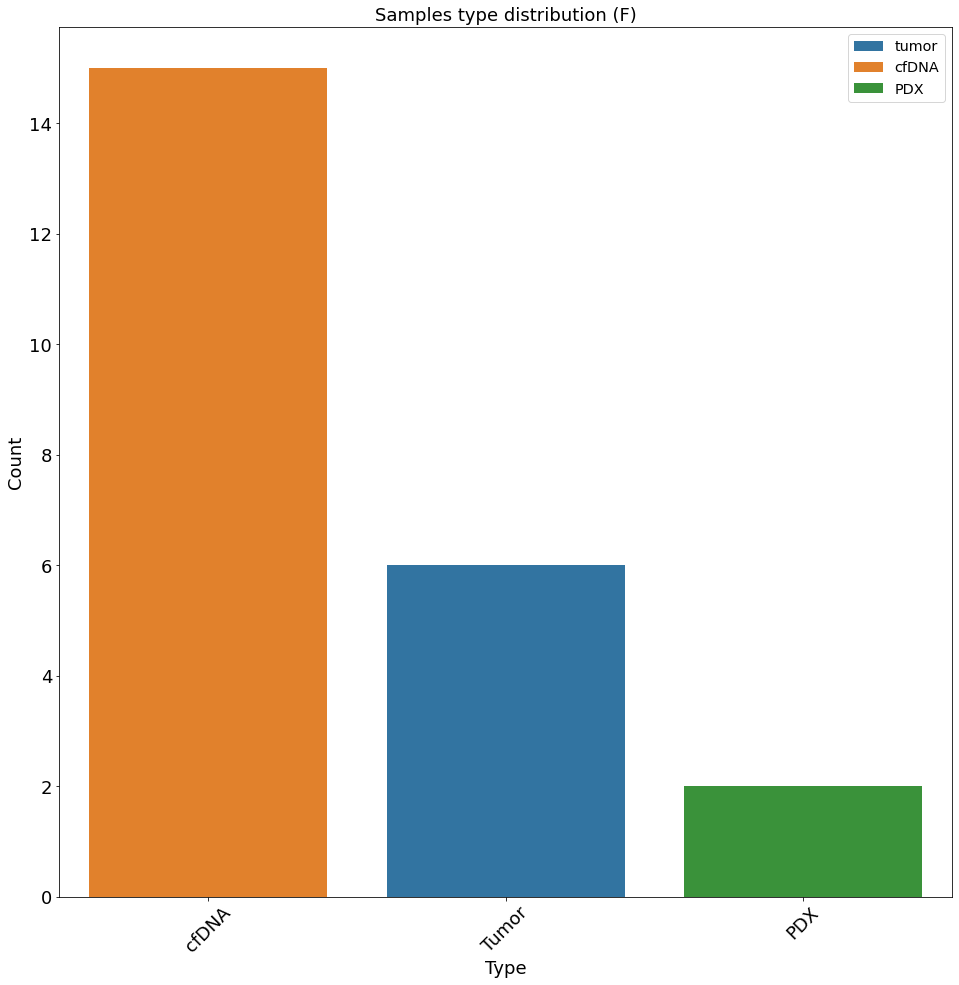

In [96]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='SAMPLE_TYPE', hue='SAMPLE_TYPE', dodge=False,
                         data=metasamples[metasamples['VAR2'] == 'F'], 
                         hue_order=['tumor', 'cfDNA', 'PDX'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.set_title('Samples type distribution (F)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution_F.pdf', dpi=180)